## CitiBike Data Analysis

In this notebook, you will find analyses on the following for CitiBikes in 2017:

1) Top 5 stations with the most starts (showing # of starts)

2) Trip duration by user type

3) Most popular trips based on start station and stop station)

4) Rider performance by Gender and Age based on avg trip distance (station to station), median speed (trip duration / distance traveled)

5) What is the busiest bike in NYC in 2017? How many times was it  used? How many minutes was it in use?


In this part of the code, I am important all relevant packages and importing my dataset. 


Because January, February, and march all have different column names, the concatanate functions would not work. Therefore, I had to fix all the column names and then concatanate the columns. 


Lastly, I saved the master dataframe as a new csv to have access for future iterations of the code. 

In [1]:
#import pandas as pd
import pandas as pd

In [2]:
#import numpy as np
import numpy as np

In [3]:
#import matplotlib.pyplot as plt
import matplotlib.pyplot as plt

In [4]:
#import seaborn as sns
import seaborn as sns

In [5]:
pwd #check current working directory

'/Users/Matthew.Giancristofaro@ibm.com/Downloads/Citibike Data'

In [6]:
ls #list all files within current directory

2017 Citibike Data.csv              201710-citibike-tripdata.csv
201701-citibike-tripdata.csv        201711-citibike-tripdata.csv
201702-citibike-tripdata.csv        201712-citibike-tripdata.csv
201703-citibike-tripdata.csv        CitiBike Data for Machine.csv
201704-citibike-tripdata.csv        CitiBike Prediction Notebook.ipynb
201705-citibike-tripdata.csv        CitiBike_Data_for_Machine1.csv
201706-citibike-tripdata.csv        Citibike Data Analysis.ipynb
201707-citibike-tripdata.csv        Untitled.ipynb
201708-citibike-tripdata.csv        Wunderground Weather Data.csv
201709-citibike-tripdata.csv        attribute_histogram_plots.png


In [7]:
#import all Citibike CSV files from 2017
df1=pd.read_csv("201701-citibike-tripdata.csv")
df2=pd.read_csv("201702-citibike-tripdata.csv")
df3=pd.read_csv("201703-citibike-tripdata.csv")
df4=pd.read_csv("201704-citibike-tripdata.csv")
df5=pd.read_csv("201705-citibike-tripdata.csv")
df6=pd.read_csv("201706-citibike-tripdata.csv")
df7=pd.read_csv("201707-citibike-tripdata.csv")
df8=pd.read_csv("201708-citibike-tripdata.csv")
df9=pd.read_csv("201709-citibike-tripdata.csv")
df10=pd.read_csv("201710-citibike-tripdata.csv")
df11=pd.read_csv("201711-citibike-tripdata.csv")
df12=pd.read_csv("201712-citibike-tripdata.csv")

In [8]:
#Months of Janurary, February and March all had different columns names. Here I changed the column names to match the rest of the data sets
df1.columns = ['tripduration', 'starttime','stoptime','start station id','start station name','start station latitude','start station longitude','end station id','end station name','end station latitude','end station longitude','bikeid','usertype','birth year','gender']
df2.columns = ['tripduration', 'starttime','stoptime','start station id','start station name','start station latitude','start station longitude','end station id','end station name','end station latitude','end station longitude','bikeid','usertype','birth year','gender']
df3.columns = ['tripduration', 'starttime','stoptime','start station id','start station name','start station latitude','start station longitude','end station id','end station name','end station latitude','end station longitude','bikeid','usertype','birth year','gender']

In [9]:
#concatanate the dataframes into one master table as master_df
master_df=pd.concat([df1,df2,df3,df4,df5,df6,df7,df8,df9,df10,df11,df12])

#print the first five rows of the master datatable
master_df.head()

#save master dataframe
#master_df.to_csv("2017 Citibike Data.csv")

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
0,680,2017-01-01 00:00:21,2017-01-01 00:11:41,3226,W 82 St & Central Park West,40.782750,-73.971370,3165,Central Park West & W 72 St,40.775794,-73.976206,25542,Subscriber,1965.0,2
1,1282,2017-01-01 00:00:45,2017-01-01 00:22:08,3263,Cooper Square & E 7 St,40.729236,-73.990868,498,Broadway & W 32 St,40.748549,-73.988084,21136,Subscriber,1987.0,2
2,648,2017-01-01 00:00:57,2017-01-01 00:11:46,3143,5 Ave & E 78 St,40.776829,-73.963888,3152,3 Ave & E 71 St,40.768737,-73.961199,18147,Customer,NaN,0
3,631,2017-01-01 00:01:10,2017-01-01 00:11:42,3143,5 Ave & E 78 St,40.776829,-73.963888,3152,3 Ave & E 71 St,40.768737,-73.961199,21211,Customer,NaN,0
4,621,2017-01-01 00:01:25,2017-01-01 00:11:47,3143,5 Ave & E 78 St,40.776829,-73.963888,3152,3 Ave & E 71 St,40.768737,-73.961199,26819,Customer,NaN,0


In [10]:
#check the shape of the dataframe
print(master_df.shape)

(16364657, 15)


# #Part 1: Top Five Start Stations

In this part, I determined the top five start stations used in 2017. 

I took the master dataframe, counted the frequency of each start station and created a new dataframe that was only the top 5.

Following, I created a bargraph that took the five top stations, and displayed the number of times each station was used. 

In [11]:
#PART 1: TOP FIVE START STATIONS
#count the frequency of each station by selecting the column "start station name", and counting the frequency of each element.
#Then, take the 5 larget
station_starts_df=master_df['start station name'].value_counts().nlargest(5)

#print first five columns of new dataframe
station_starts_df.head()

Pershing Square North    162716
E 17 St & Broadway       112218
Broadway & E 22 St       108590
W 21 St & 6 Ave          107133
West St & Chambers St    105610
Name: start station name, dtype: int64

In [12]:
#create dataframe from frequency list
top_stations=pd.DataFrame(station_starts_df)

#add new column with the index - in this case, the station names - as a list 
top_stations['Station Name']=top_stations.index.tolist()

#change names of the columns
top_stations=top_stations.rename(index=str,columns={"start station name":"Number of Times Used","Station Name":"Station Name"})

#call the new data frame
top_stations

,Number of Times Used,Station Name
Pershing Square North,162716,Pershing Square North
E 17 St & Broadway,112218,E 17 St & Broadway
Broadway & E 22 St,108590,Broadway & E 22 St
W 21 St & 6 Ave,107133,W 21 St & 6 Ave
West St & Chambers St,105610,West St & Chambers St


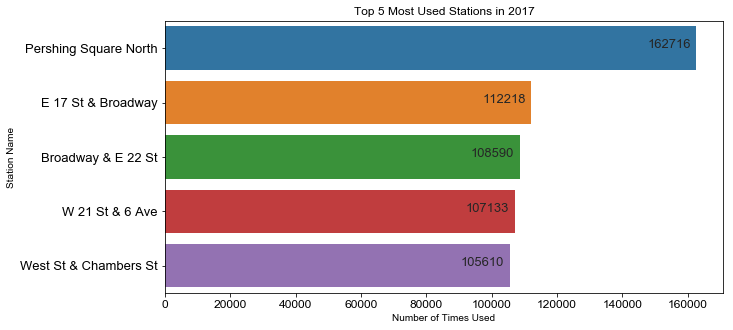

In [13]:
#plot horizontal bar graph with the data from top_stations using seaborn
plt.subplots(figsize=(10,5))
sns.set(style='whitegrid',palette=None,font_scale=1)
sns.barplot(x="Number of Times Used",y="Station Name",data=top_stations).set_title("Top 5 Most Used Stations in 2017")

#change the font size of the x and y tick marks
plt.xticks(fontsize=12)
plt.yticks(fontsize=13)

#Add numeric labels to each bar using a for loop
for i in range(0,len(top_stations)):
    plt.text(top_stations["Number of Times Used"][i]-15000,i,top_stations["Number of Times Used"][i],fontsize=13)

# #Part 2: Trip Duration by User Type
In this part of the code, I determine information about the tripduration filtered by the two usertypes, Customer and Subscribers. 

1) Create a new dataframe that indexes the columns 'tripduration' and 'usertype' from the dataframe

2) Clean the data: 

    a. Remove all rows where tripduration is less than 90 seconds (this assumes that the user mistakenly took a bike out)
    
    b. Remove all rows where trip duration is greater than 2.5 hours. CitiBikes website says the max tripduration for customers before getting charged is 30 minutes and for subscribers 45 minutes. Therefore cleaning this data will improve results. 
    

3) Convert the tripduration column into minutes. This allows a graph to be created that wont be extremely massive due to seconds

4) Create a box plot that is grouped by usertype. This boxplot reveals several pieces of necessary information for the customer to view, such as median, min and max trip durations. 


In [14]:
#PART 2: TRIP DURATION BY USER TYPE
#create new dataframe to only include trip duration and usertype from the master dataframe
trip_dur_user1=master_df[["tripduration",'usertype']]

#call new dataframe first five rows
trip_dur_user1.head()

,tripduration,usertype
0,680,Subscriber
1,1282,Subscriber
2,648,Customer
3,631,Customer
4,621,Customer


In [15]:
#clean the data from assumptions. It is safe to assume that any trip under 1.5 minutes was not a valid trip. i.e. the user
#probably pulled out the bike and put it back in without riding it. 
trip_dur_user1=trip_dur_user1[trip_dur_user1["tripduration"]>90]

#From the CitiBike website, Customers have 30 minutes per ride before getting charged extra, and subscribers had 45 minutes.
#It is safe to say that any ride over 2.5 hours is an anomoly and can be cleaned
#additionally, removing this data accounts for less than 5 percent of the dataset. The removal would not negatively impact results
trip_dur_user2=trip_dur_user1[trip_dur_user1["tripduration"]<9000]

#last step is to reset the index of the cleaned data frame
trip_dur_user2=trip_dur_user2.reset_index(drop=True)

#print out the first five rows of the dataframe
trip_dur_user2.head()

,tripduration,usertype
0,680,Subscriber
1,1282,Subscriber
2,648,Customer
3,631,Customer
4,621,Customer


In [16]:
#add column in dataframe that is trip duration in minutes
trip_dur_user2["Trip Duration in Minutes"]=trip_dur_user2["tripduration"]/60

#drop all NAN values in the dataframe to clean results
trip_dur_user3=trip_dur_user2.dropna().reset_index(drop=True)

#Call new dataframe first five rows
trip_dur_user3.head()

,tripduration,usertype,Trip Duration in Minutes
0,680,Subscriber,11.333333
1,1282,Subscriber,21.366667
2,648,Customer,10.800000
3,631,Customer,10.516667
4,621,Customer,10.350000


In [17]:
#Figure out the Median Trip duration based on UserType
trip_dur_user4=pd.DataFrame(trip_dur_user3.groupby(["usertype"])["Trip Duration in Minutes"].median())
trip_dur_user4

,Trip Duration in Minutes
usertype,
Customer,21.333333
Subscriber,9.583333


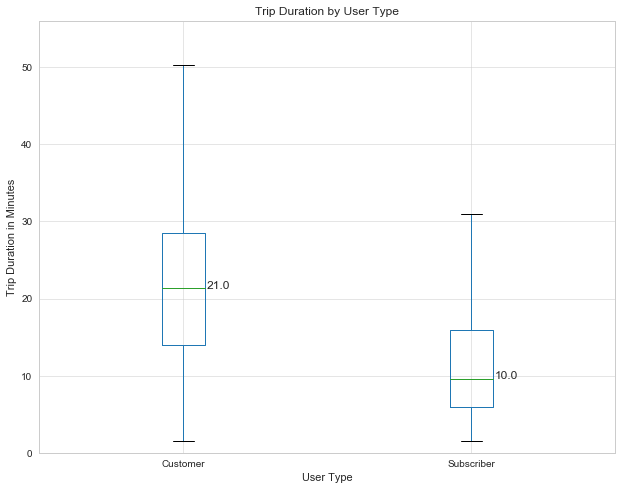

In [18]:
#plot boxplot of Trip Duration in minutes, by the usertype and remove the outlier data points
trip_dur_user3.boxplot(column='Trip Duration in Minutes', by='usertype',figsize=(10,8),showfliers=False)

#customize the boxplot

plt.ylim((0,56))
plt.ylabel("Trip Duration in Minutes")
plt.xlabel("User Type")
plt.suptitle('')
plt.title("Trip Duration by User Type")
plt.grid(linewidth='0.5')
plt.text(1+0.08,trip_dur_user4["Trip Duration in Minutes"][0],trip_dur_user4["Trip Duration in Minutes"][0].round())
plt.text(2+0.08,trip_dur_user4["Trip Duration in Minutes"][1],trip_dur_user4["Trip Duration in Minutes"][1].round())
plt.show()

# #Part 3: Most Popular Trips in 2017

In this part of the code, I determined the most popular trips taken based on the frequency of the combinations of start and end stations.

1) Create a new data frame that only contains the start and end station names from the dataframe with rows of trip duration inbetween 1.5 minutes and 2.5 hours

2) Group the dataframe first by start station name and then end station name and count its frequency. Place that frequency value in a new column called "number of trips"

4) create a new column that concatantes the start and end station to read "Station A to Station B"

3) Sort the new data frame by number of trips and call the top ten

4) Plot the data frame on a bargraph, revealing the number of trips taken. 

In [19]:
#PART 3: DETERMINE MOST POPULAR TRIPS IN 2017
#create new dataframe, call it mp_trips1 for most popular trips, that only contains rows of the master where tripduration is great than 1.5 minutes
mp_trips1=master_df[master_df["tripduration"]>90]

#clean the mp trips dataframe by removing any trips greater than 2.5 hours
mp_trips1=mp_trips1[mp_trips1["tripduration"]<9000]

#Create new data frame that only contains the columns start and end station name
mp_trips2=mp_trips1[["start station name","end station name"]]

#print first five rows
mp_trips2.head()

,start station name,end station name
0,W 82 St & Central Park West,Central Park West & W 72 St
1,Cooper Square & E 7 St,Broadway & W 32 St
2,5 Ave & E 78 St,3 Ave & E 71 St
3,5 Ave & E 78 St,3 Ave & E 71 St
4,5 Ave & E 78 St,3 Ave & E 71 St


In [20]:
#Create a dataframe that contains the frequency of every start and end station combination, by grouping by 
#the start station name first, then the end station, and creating a new column with the frequency
mp_trips_grouped=mp_trips2.groupby(["start station name", "end station name"]).size().reset_index(name="Number of Trips Made")

#print first five rows
mp_trips_grouped.head()

,start station name,end station name,Number of Trips Made
0,1 Ave & E 110 St,1 Ave & E 110 St,25
1,1 Ave & E 110 St,1 Ave & E 68 St,7
2,1 Ave & E 110 St,1 Ave & E 78 St,61
3,1 Ave & E 110 St,1 Ave & E 94 St,15
4,1 Ave & E 110 St,11 Ave & W 27 St,1


In [21]:
#create new dataframe by sorting the mp_trips_grouped by Number of Trips Made in Descending Order
mp_trips_sorted=mp_trips_grouped.sort_values(by=['Number of Trips Made'],ascending=False)
mp_trips_sorted.head()

,start station name,end station name,Number of Trips Made
74303,Central Park S & 6 Ave,Central Park S & 6 Ave,6788
74226,Central Park S & 6 Ave,5 Ave & E 88 St,6304
140780,E 7 St & Avenue A,Cooper Square & E 7 St,5972
7863,12 Ave & W 40 St,West St & Chambers St,5396
167119,Grand Army Plaza & Central Park S,Grand Army Plaza & Central Park S,5234


In [22]:
#Create new column by combine start station column and end station column
mp_trips_sorted["Trip"]=mp_trips_sorted["start station name"]+ " to " + mp_trips_sorted["end station name"]
mp_trips_sorted.head()

,start station name,end station name,Number of Trips Made,Trip
74303,Central Park S & 6 Ave,Central Park S & 6 Ave,6788,Central Park S & 6 Ave to Central Park S & 6 Ave
74226,Central Park S & 6 Ave,5 Ave & E 88 St,6304,Central Park S & 6 Ave to 5 Ave & E 88 St
140780,E 7 St & Avenue A,Cooper Square & E 7 St,5972,E 7 St & Avenue A to Cooper Square & E 7 St
7863,12 Ave & W 40 St,West St & Chambers St,5396,12 Ave & W 40 St to West St & Chambers St
167119,Grand Army Plaza & Central Park S,Grand Army Plaza & Central Park S,5234,Grand Army Plaza & Central Park S to Grand Arm...


In [23]:
#create new dataframe for the top ten trips made, which are the first 10 rows
mp_trips_top_ten=mp_trips_sorted.head(10)
mp_trips_top_ten

,start station name,end station name,Number of Trips Made,Trip
74303,Central Park S & 6 Ave,Central Park S & 6 Ave,6788,Central Park S & 6 Ave to Central Park S & 6 Ave
74226,Central Park S & 6 Ave,5 Ave & E 88 St,6304,Central Park S & 6 Ave to 5 Ave & E 88 St
140780,E 7 St & Avenue A,Cooper Square & E 7 St,5972,E 7 St & Avenue A to Cooper Square & E 7 St
7863,12 Ave & W 40 St,West St & Chambers St,5396,12 Ave & W 40 St to West St & Chambers St
167119,Grand Army Plaza & Central Park S,Grand Army Plaza & Central Park S,5234,Grand Army Plaza & Central Park S to Grand Arm...
267932,W 21 St & 6 Ave,9 Ave & W 22 St,4831,W 21 St & 6 Ave to 9 Ave & W 22 St
223693,Pershing Square North,Broadway & W 32 St,4520,Pershing Square North to Broadway & W 32 St
77697,Centre St & Chambers St,Centre St & Chambers St,4473,Centre St & Chambers St to Centre St & Chamber...
223827,Pershing Square North,E 24 St & Park Ave S,4402,Pershing Square North to E 24 St & Park Ave S
301631,West St & Chambers St,12 Ave & W 40 St,4330,West St & Chambers St to 12 Ave & W 40 St


In [24]:
#create a new dataframe where the index is reset
mp_trips_top_ten1=mp_trips_top_ten.reset_index(drop=True)
mp_trips_top_ten1

,start station name,end station name,Number of Trips Made,Trip
0,Central Park S & 6 Ave,Central Park S & 6 Ave,6788,Central Park S & 6 Ave to Central Park S & 6 Ave
1,Central Park S & 6 Ave,5 Ave & E 88 St,6304,Central Park S & 6 Ave to 5 Ave & E 88 St
2,E 7 St & Avenue A,Cooper Square & E 7 St,5972,E 7 St & Avenue A to Cooper Square & E 7 St
3,12 Ave & W 40 St,West St & Chambers St,5396,12 Ave & W 40 St to West St & Chambers St
4,Grand Army Plaza & Central Park S,Grand Army Plaza & Central Park S,5234,Grand Army Plaza & Central Park S to Grand Arm...
5,W 21 St & 6 Ave,9 Ave & W 22 St,4831,W 21 St & 6 Ave to 9 Ave & W 22 St
6,Pershing Square North,Broadway & W 32 St,4520,Pershing Square North to Broadway & W 32 St
7,Centre St & Chambers St,Centre St & Chambers St,4473,Centre St & Chambers St to Centre St & Chamber...
8,Pershing Square North,E 24 St & Park Ave S,4402,Pershing Square North to E 24 St & Park Ave S
9,West St & Chambers St,12 Ave & W 40 St,4330,West St & Chambers St to 12 Ave & W 40 St


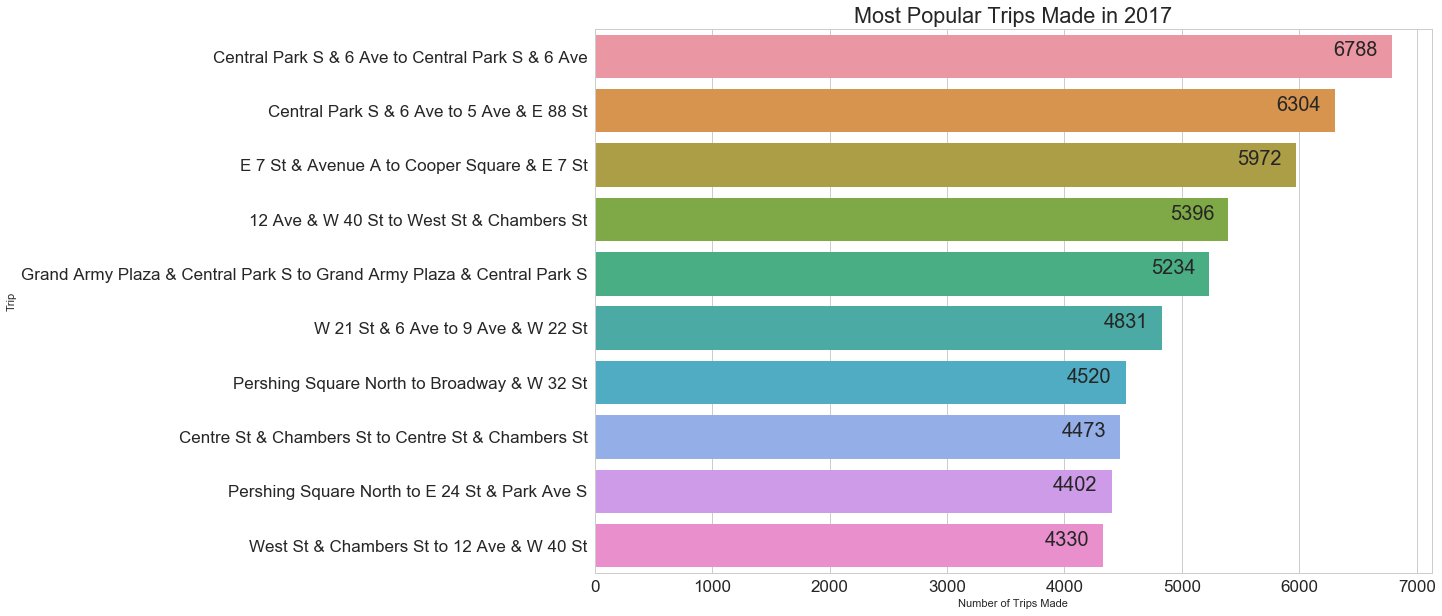

In [25]:
#plot most popular trips made in 2017 using Seaborn
#Customize the plot figure
plt.subplots(figsize=(15,10))
plt.grid(True) #show gridlines
plt.xticks(fontsize=17)
plt.yticks(fontsize=17)
sns.set(font_scale=1.8)
sns.barplot(x="Number of Trips Made",y="Trip",data=mp_trips_top_ten).set_title("Most Popular Trips Made in 2017")


#Add numeric labels to each bar using a for loop
for i in range(0,len(mp_trips_top_ten1)):
    m=mp_trips_top_ten1["Number of Trips Made"][i]
    n=i
    plt.text(m-500,n,mp_trips_top_ten1["Number of Trips Made"][i],fontsize=20)


# # Part 4: Determining Rider Performance by Gender and Age for Average Distance and Median Speed

This part of the code took many steps.

Step 1: Calculate the distance in between stations

1) Create a new data frame from the master dataframe with only the coordinates for each station

2) Import the math package and use the Haversine Formula with a for loop to create a new list that contains every calculated distance for each trip made. This output is distance in kilometers.

3) Finally, add that column back into the master dataframe because it will be usefull down the road. 

Step 2: Calculate average distance and median speed for groups grouped by gender and age

1) Create a data frame from the master dataframe that is the columns gender, birth year, tripduration and distance travelled 

2) Clean the data so all rows containing NAN values are dropped, and anyone 70 years or older is removed to prevent anamolies from affecting the result

3) Create a new column named "Age" that is 2017 minus each rider's birth year. 

4) Remove all rows that distance is 0 because that will skew all the data

5) Determine the mean speed of each distinct group by grouping by gender and age and finding the mean speed using the .mean() function

6) Create a new column, Speed in m/s that takes the distance travelled and divides it by tripduration.

7) Group by Gender and then Age and find the median speed of each distinct group.

8) Lastly, to plot on a scatter plot various customizations are needed. First, I created a new list that attaches a distinct color for each gender, unknown = yellow, male=blue, female = red.

9) I then plotted this scatterplot and portrayed age by the varying sizes of dots. 


In [26]:
#PART 4: Determining Rider Performance by Gender and Age for Average Distance and Median Speed
#create new dataframe with starting and ending coordinates for each trip
coord_df=master_df[['start station latitude','start station longitude','end station latitude','end station longitude']]
coord_df=coord_df.reset_index()
coord_df.head()

,index,start station latitude,start station longitude,end station latitude,end station longitude
0,0,40.782750,-73.971370,40.775794,-73.976206
1,1,40.729236,-73.990868,40.748549,-73.988084
2,2,40.776829,-73.963888,40.768737,-73.961199
3,3,40.776829,-73.963888,40.768737,-73.961199
4,4,40.776829,-73.963888,40.768737,-73.961199


In [27]:
#Calculate the distance based on latitude and longitude using a known Haversine Formula

#import math functions from math library to perform needed functions
from math import sin, cos, sqrt, atan2, radians

# approximate radius of earth in km
R = 6373.0

#create blank list
list1=[]

#create for loop that indexes each coordinate from the dataframe and run it through the equation for distance in km
for i in range(0,len(coord_df)):
    lat1 = radians(coord_df["start station latitude"][i])
    lon1 = radians(coord_df["start station longitude"][i])
    lat2 = radians(coord_df["end station latitude"][i])
    lon2 = radians(coord_df["end station longitude"][i])

    dlon = lon2 - lon1
    dlat = lat2 - lat1

    a = sin(dlat / 2)**2 + cos(lat1) * cos(lat2) * sin(dlon / 2)**2
    c = 2 * atan2(sqrt(a), sqrt(1 - a))

    distance = R * c

    list1.append(distance) #append the blank list with each calculated distance

In [28]:
#add column for distance in km to master dataframe
master_df["Distance in km"]=list1
master_df.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender,Distance in km
0,680,2017-01-01 00:00:21,2017-01-01 00:11:41,3226,W 82 St & Central Park West,40.782750,-73.971370,3165,Central Park West & W 72 St,40.775794,-73.976206,25542,Subscriber,1965.0,2,0.874395
1,1282,2017-01-01 00:00:45,2017-01-01 00:22:08,3263,Cooper Square & E 7 St,40.729236,-73.990868,498,Broadway & W 32 St,40.748549,-73.988084,21136,Subscriber,1987.0,2,2.160859
2,648,2017-01-01 00:00:57,2017-01-01 00:11:46,3143,5 Ave & E 78 St,40.776829,-73.963888,3152,3 Ave & E 71 St,40.768737,-73.961199,18147,Customer,NaN,0,0.928094
3,631,2017-01-01 00:01:10,2017-01-01 00:11:42,3143,5 Ave & E 78 St,40.776829,-73.963888,3152,3 Ave & E 71 St,40.768737,-73.961199,21211,Customer,NaN,0,0.928094
4,621,2017-01-01 00:01:25,2017-01-01 00:11:47,3143,5 Ave & E 78 St,40.776829,-73.963888,3152,3 Ave & E 71 St,40.768737,-73.961199,26819,Customer,NaN,0,0.928094


In [29]:
#create new dataframe with with gender, birth year, trip duration and distance traveled
gen_age_metrics=master_df[["gender","birth year","tripduration","Distance in km"]]
gen_age_metrics.head()

,gender,birth year,tripduration,Distance in km
0,2,1965.0,680,0.874395
1,2,1987.0,1282,2.160859
2,0,NaN,648,0.928094
3,0,NaN,631,0.928094
4,0,NaN,621,0.928094


In [30]:
#clean the data of this dataframe
#drop all rows that contain values with NAN
gen_age_metrics=gen_age_metrics.dropna()

#Drop all rows where the user's age is greater than 69. This is under the assumption that anyone older than 
#70 doesn't use CitiBikes and that those inputs are misinformation
gen_age_metrics=gen_age_metrics[gen_age_metrics["birth year"]>1947]

#print first five rows
gen_age_metrics.head()

,gender,birth year,tripduration,Distance in km
0,2,1965.0,680,0.874395
1,2,1987.0,1282,2.160859
5,1,2000.0,666,0.000000
6,1,1973.0,559,1.269845
7,2,1977.0,826,2.753588


In [31]:
#create new column called Age which is 2017 minus their birth year
gen_age_metrics["Age"]=2017-gen_age_metrics["birth year"]

#print the first five rows
gen_age_metrics.head()

,gender,birth year,tripduration,Distance in km,Age
0,2,1965.0,680,0.874395,52.0
1,2,1987.0,1282,2.160859,30.0
5,1,2000.0,666,0.000000,17.0
6,1,1973.0,559,1.269845,44.0
7,2,1977.0,826,2.753588,40.0


In [32]:
#drop all rows where distance = 0 because it will skew dataset. This removes all trips that start and end at the same station
#that were full trips but show up in the dataframe as 0 distance travelled
gen_age_metrics=gen_age_metrics[gen_age_metrics["Distance in km"] != 0].reset_index(drop=True)

#print first five rows
gen_age_metrics.head()

,gender,birth year,tripduration,Distance in km,Age
0,2,1965.0,680,0.874395,52.0
1,2,1987.0,1282,2.160859,30.0
2,1,1973.0,559,1.269845,44.0
3,2,1977.0,826,2.753588,40.0
4,1,1989.0,255,1.157738,28.0


In [33]:
#Sort data frame by "Age" to see oldest age 
gen_age_metrics.sort_values(by=["Age"],ascending=False).head()

,gender,birth year,tripduration,Distance in km,Age
5637015,1,1948.0,898,1.661935,69.0
570407,2,1948.0,338,0.614990,69.0
1228303,1,1948.0,825,1.369651,69.0
13138703,2,1948.0,700,1.216653,69.0
12671941,1,1948.0,224,0.554449,69.0


In [34]:
#group dataframe by gender and age and reveal average distance traveled per group 
gen_age_metrics_grouped=gen_age_metrics.groupby(["gender","Age"])["Distance in km"].mean().reset_index()

#print first five rows
gen_age_metrics_grouped.head()

,gender,Age,Distance in km
0,0,16.0,2.236543
1,0,17.0,1.184705
2,0,18.0,1.326296
3,0,19.0,1.376808
4,0,20.0,1.634323


In [35]:
#create new column that is distance measured in meters
gen_age_metrics["Distance in Meters"]=gen_age_metrics["Distance in km"]*1000

In [36]:
#create new column that is the speed measuresd in meters per second
gen_age_metrics["Speed in m/s"]=gen_age_metrics["Distance in Meters"]/gen_age_metrics["tripduration"]

#print first five rows
gen_age_metrics.head()

,gender,birth year,tripduration,Distance in km,Age,Distance in Meters,Speed in m/s
0,2,1965.0,680,0.874395,52.0,874.394902,1.285875
1,2,1987.0,1282,2.160859,30.0,2160.858819,1.685537
2,1,1973.0,559,1.269845,44.0,1269.844833,2.271637
3,2,1977.0,826,2.753588,40.0,2753.588103,3.333642
4,1,1989.0,255,1.157738,28.0,1157.737648,4.540148


In [37]:
#group dataframe by gender and age and measure the median speed per group
gen_age_metrics_grouped1=gen_age_metrics.groupby(["gender","Age"])["Speed in m/s"].median().reset_index()

#print first five rows
gen_age_metrics_grouped1.head()

,gender,Age,Speed in m/s
0,0,16.0,2.692825
1,0,17.0,2.053320
2,0,18.0,2.233983
3,0,19.0,2.059011
4,0,20.0,1.812581


In [38]:
#Add column filled with median speed to dataframe containing average distance per gender and age group
gen_age_metrics_grouped["Speed in m/s"]=gen_age_metrics_grouped1["Speed in m/s"]

#print first five rows
gen_age_metrics_grouped.head()

,gender,Age,Distance in km,Speed in m/s
0,0,16.0,2.236543,2.692825
1,0,17.0,1.184705,2.053320
2,0,18.0,1.326296,2.233983
3,0,19.0,1.376808,2.059011
4,0,20.0,1.634323,1.812581


In [39]:

gender = gen_age_metrics_grouped["gender"]

#create an empty list and use a for loop to fill it with colors based on whether gender is unkown, male, or female
gender_color=[]
for elem in gender:
    if elem == 0:
        gender_color.append('y')
    elif elem == 1:
            gender_color.append('b')
    else:
                gender_color.append('r')
                

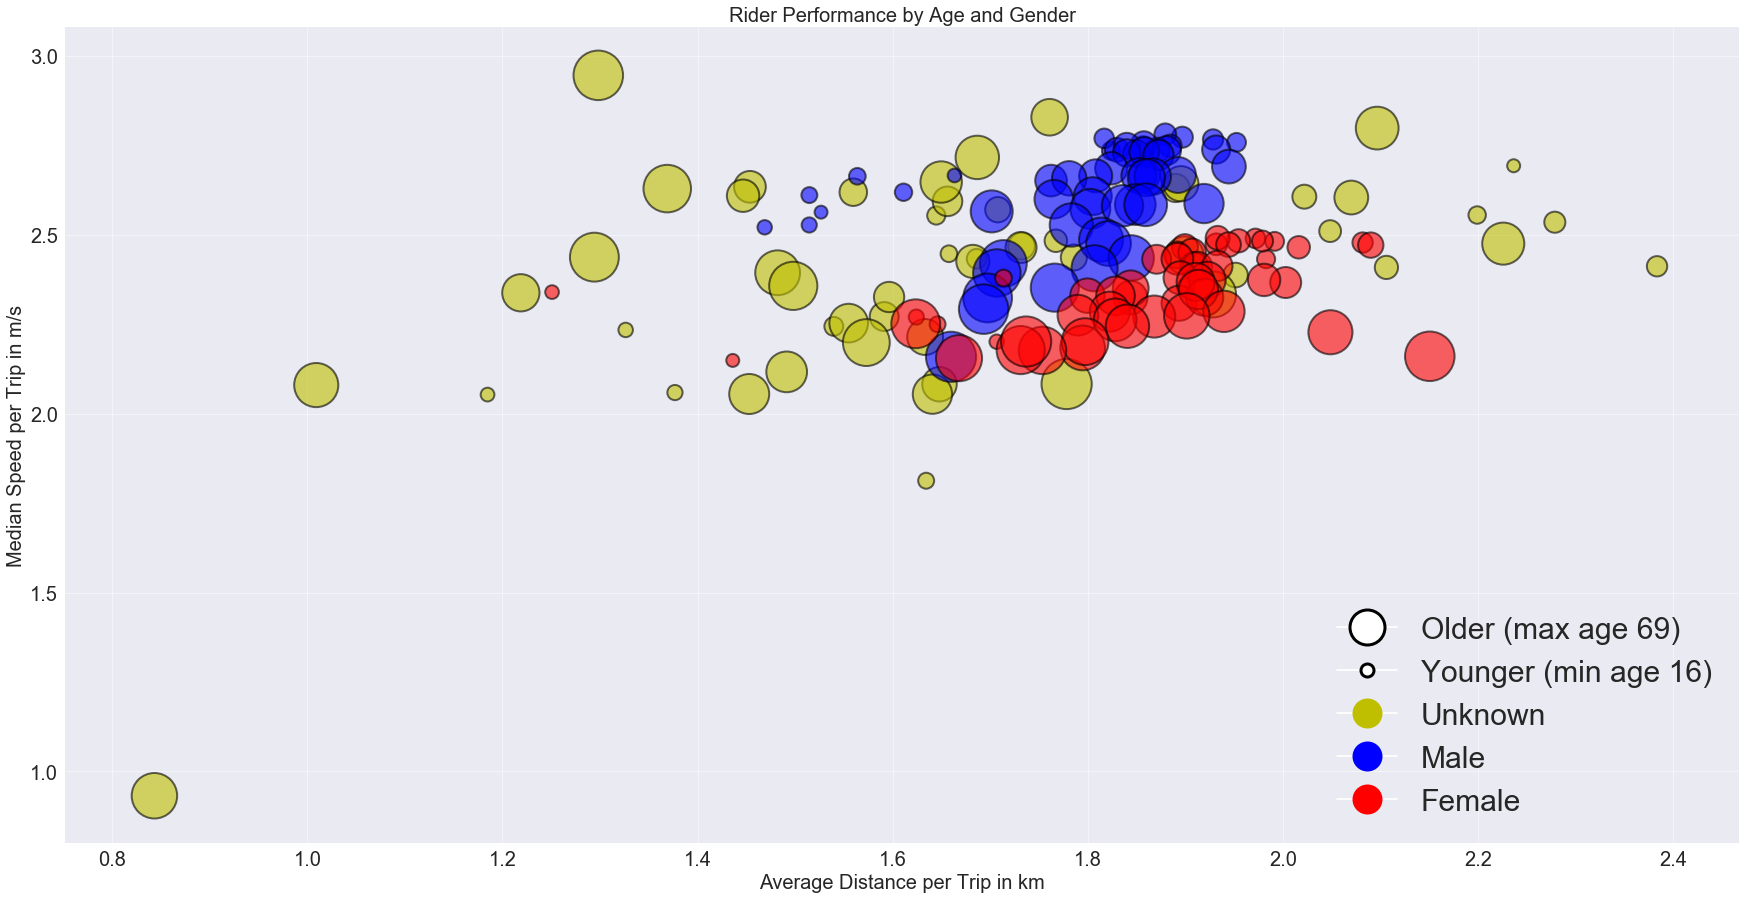

In [40]:
#plot scatter chart that demonstrated rider performance by Age and Gender
#import 2D lines from matplotlib.lines
from matplotlib.lines import Line2D

#plot the figure
fig = plt.figure(figsize=(30, 15))
ax = fig.add_subplot(1,1,1)

#plot scatter graph where x-axis is average distance, y-axis is speed, size of dot varies by age and color by gender
ax.scatter(gen_age_metrics_grouped['Distance in km'],gen_age_metrics_grouped['Speed in m/s'], s=gen_age_metrics_grouped['Age']**1.85,linewidth=2,c=gender_color, alpha = 0.6,edgecolors='k')

#customize the chart
plt.xlabel('Average Distance per Trip in km', fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.ylabel('Median Speed per Trip in m/s',fontsize=20)
plt.title('Rider Performance by Age and Gender',fontsize=20)

#create legend for chart

legend_elements = [Line2D([0], [0], marker = 'o', color='w', label='Older (max age 69)',markeredgewidth=3,markeredgecolor='k',markerfacecolor='w', markersize=35),
                   Line2D([0], [0], marker = 'o', color='w', label='Younger (min age 16)',markeredgewidth=3,markeredgecolor='k',markerfacecolor='w', markersize=13),
                    Line2D([0], [0], marker = 'o', color='w', label='Unknown',markerfacecolor='y', markersize=30),
                   Line2D([0], [0], marker='o', color='w', label='Male',
                          markerfacecolor='b', markersize=30),
                   Line2D([0], [0], marker='o', color='w', label='Female',
                          markerfacecolor='r', markersize=30)]

plt.legend(handles=legend_elements,loc='lower right',prop={'size': 30})

plt.grid(linewidth='0.5')
plt.show()

## Part 5: Busiest Bike

In this part of the code, I determine the busiest bike used in 2017 and calculate the number of trips it made and the number of minutes it was in use.

1) Create a dataframe that grouped the master dataframe by bike id and then creates a new column that is all the frequency values

2) sort the dataframe by number of trips made and take the top 5

3) To calculate minutes in use, I created a for loop that takes the master dataframe the filters it by each unique bikeid. When the master data only shows rows for that unique bike id, it calculated the sum of tripduration, and divides by 60 to calculate minutes. This value is added to an empty list, busybikelist, which is then added as a new column in the dataframe.

4) Last part is to plot this information. I created a twin bargraph with two different y axes. The first y axis measures number of trips made and the second y axis reveals minutes in use. 

In [41]:
#PART 5: Determine busiest bike and its number of trips made and minutes used
#determine busiest bike used by grouping by bike ID and counting the frequency in a new dataframe
busy_bike=master_df.groupby(["bikeid"]).size().reset_index(name="Number of Trips Made by Bike")
busy_bike.head()

,bikeid,Number of Trips Made by Bike
0,14529,1100
1,14530,1150
2,14531,1399
3,14532,1173
4,14533,1554


In [42]:
#create new dataframe that sorts busy bike dataframe by trips made and print out the first five
busybike4=busy_bike.sort_values("Number of Trips Made by Bike",ascending=False).reset_index(drop=True)
busybike4=busybike4.head()
busybike4

,bikeid,Number of Trips Made by Bike
0,25738,2514
1,25275,2409
2,27161,2376
3,26565,2370
4,27111,2349


In [43]:
#create an empty list and run a for loop that first creates a dataframe that is only the rows of information that 
#matches each unique bike ID. Then it takes the sum of the trip duration column and divides by 60 to get minutes
#then append that value to the empty list

busybikelist=[]

for i in range(0,len(busybike4)):
    busybiketime=master_df[master_df["bikeid"]==busybike4["bikeid"][i]]
    busybikeseconds=busybiketime["tripduration"].sum()
    busybikeminutes=busybikeseconds/60
    busybikelist.append(busybikeminutes)
    
    

In [44]:
#create a new column in the dataframe that contains all values from the list made in the for loops, total minutes used
busybike4["Total Minutes Used in 2017"]=busybikelist
busybike4

,bikeid,Number of Trips Made by Bike,Total Minutes Used in 2017
0,25738,2514,40970.700000
1,25275,2409,34541.000000
2,27161,2376,32632.500000
3,26565,2370,35745.833333
4,27111,2349,37528.533333


In [45]:
#create a new dataframe that rounds the minutes used column to whole number
busybike5=busybike4["Total Minutes Used in 2017"].round()
busybike5

0    40971.0
1    34541.0
2    32632.0
3    35746.0
4    37529.0
Name: Total Minutes Used in 2017, dtype: float64

In [46]:
#add new column to the dataframe busybike4 that is the rounded values of the minutes used
busybike4["Total Minutes Used in 2017"]=busybike5

In [47]:
#call the dataframe busybike4
busybike4

,bikeid,Number of Trips Made by Bike,Total Minutes Used in 2017
0,25738,2514,40971.0
1,25275,2409,34541.0
2,27161,2376,32632.0
3,26565,2370,35746.0
4,27111,2349,37529.0


In [48]:
#convert the bike id column to a string value and print the column
bikeid_str = busybike4["bikeid"].astype(str)
print(bikeid_str)

0    25738
1    25275
2    27161
3    26565
4    27111
Name: bikeid, dtype: object


In [49]:
#Apply the string values of bike id into the busybike 4 column
busybike4["Bike ID"]=bikeid_str
busybike4

,bikeid,Number of Trips Made by Bike,Total Minutes Used in 2017,Bike ID
0,25738,2514,40971.0,25738
1,25275,2409,34541.0,25275
2,27161,2376,32632.0,27161
3,26565,2370,35746.0,26565
4,27111,2349,37529.0,27111


/Users/Matthew.Giancristofaro@ibm.com/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: MatplotlibDeprecationWarning: The set_axis_bgcolor function was deprecated in version 2.0. Use set_facecolor instead.
  """


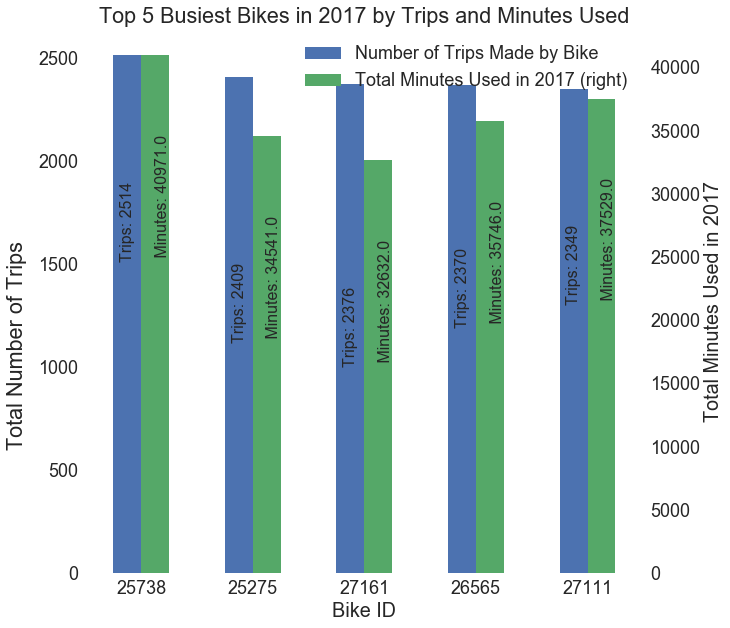

In [50]:
#plot a twinbar graph for the top five busiest bikeswhere the first y axis measures number of trips used, 
#and the second axis measures the total number of minutes used by each bike
busybike6=busybike4[["Number of Trips Made by Bike","Total Minutes Used in 2017","Bike ID"]]

busybike6.plot(x="Bike ID", kind= 'bar', figsize=(10,10), secondary_y= 'Total Minutes Used in 2017', rot= 0).set_axis_bgcolor("w")

for i in range(0,len(busybike6)):
    plt.text(i-0.19,busybike6["Total Minutes Used in 2017"][i]-10000,
             "Trips: " + str(busybike6["Number of Trips Made by Bike"][i])
            + "\n" + "\n Minutes: " + str(busybike6["Total Minutes Used in 2017"][i]), fontsize = 16, rotation = 90)
    
plt.text(-1.2, 25000, "Total Number of Trips", rotation = 90)
plt.xlabel('Bike ID', fontweight="bold", fontsize=20)
plt.ylabel("Total Minutes Used in 2017")
plt.title("Top 5 Busiest Bikes in 2017 by Trips and Minutes Used")
plt.grid(False)
plt.show()

# #Prepping Data for Predictive Model

In this part of the code, I prep my master dataframe and other additional information to be used in a predictive linear regression model. 

1) First, I created a column that is only the day of year the bike was used, excluding the time it was taken. The purpose of this was to prep my information for the merging of weather data AND to include start day as a predictor variable

2) Take the gender column and turn them into strings, creating categorical variables that will be dummified

3) Fix all NaN's in the 'age' column by assigning them as 0 instead of NaN

4) Import weather data from WUnderground

5) Use a left join to merge the data from wunderground with the master dataframe by the day of year.

6) Clean the data by removing all NaN's from the 'Event' column from the weather data and drop all rows where the tripduration is greater than 2.5 hours. 

7) Create a new column titled "day of week" that takes each day of the year and turns it into a number 0-6, 0=monday, 6=sunday using the DateTime package

8) Lastly, save this new dataframe as a csv to be later used in the predictive modeling portion

In [51]:
###### Predictive Modeling Portion #####

In [52]:
master_df.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender,Distance in km
0,680,2017-01-01 00:00:21,2017-01-01 00:11:41,3226,W 82 St & Central Park West,40.782750,-73.971370,3165,Central Park West & W 72 St,40.775794,-73.976206,25542,Subscriber,1965.0,2,0.874395
1,1282,2017-01-01 00:00:45,2017-01-01 00:22:08,3263,Cooper Square & E 7 St,40.729236,-73.990868,498,Broadway & W 32 St,40.748549,-73.988084,21136,Subscriber,1987.0,2,2.160859
2,648,2017-01-01 00:00:57,2017-01-01 00:11:46,3143,5 Ave & E 78 St,40.776829,-73.963888,3152,3 Ave & E 71 St,40.768737,-73.961199,18147,Customer,NaN,0,0.928094
3,631,2017-01-01 00:01:10,2017-01-01 00:11:42,3143,5 Ave & E 78 St,40.776829,-73.963888,3152,3 Ave & E 71 St,40.768737,-73.961199,21211,Customer,NaN,0,0.928094
4,621,2017-01-01 00:01:25,2017-01-01 00:11:47,3143,5 Ave & E 78 St,40.776829,-73.963888,3152,3 Ave & E 71 St,40.768737,-73.961199,26819,Customer,NaN,0,0.928094


In [53]:
#split the starttime and create new start day column that is only the date and not time
master_df["startday"]=master_df["starttime"].str.split(' ').str.get(0)
master_df.head(3)

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender,Distance in km,startday
0,680,2017-01-01 00:00:21,2017-01-01 00:11:41,3226,W 82 St & Central Park West,40.782750,-73.971370,3165,Central Park West & W 72 St,40.775794,-73.976206,25542,Subscriber,1965.0,2,0.874395,2017-01-01
1,1282,2017-01-01 00:00:45,2017-01-01 00:22:08,3263,Cooper Square & E 7 St,40.729236,-73.990868,498,Broadway & W 32 St,40.748549,-73.988084,21136,Subscriber,1987.0,2,2.160859,2017-01-01
2,648,2017-01-01 00:00:57,2017-01-01 00:11:46,3143,5 Ave & E 78 St,40.776829,-73.963888,3152,3 Ave & E 71 St,40.768737,-73.961199,18147,Customer,NaN,0,0.928094,2017-01-01


In [54]:
#reset the index of the new master dataframe
master_df1=master_df.reset_index()

In [55]:
#create a new blank list and run a for loop that appends it with Unknown, Male, or Female based on the index of each
#element in the gender column of the dataframe

gender_list=[]

for i in range(0,len(master_df1)):
    if master_df1["gender"][i]==0:
        gender_list.append("Unknown")
    elif master_df1["gender"][i]==1:
        gender_list.append("Male")
    else:
        gender_list.append("Female")

In [56]:
#Replace current Gender column with new string values
master_df1["gender"]=gender_list
master_df1.head()

,index,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender,Distance in km,startday
0,0,680,2017-01-01 00:00:21,2017-01-01 00:11:41,3226,W 82 St & Central Park West,40.782750,-73.971370,3165,Central Park West & W 72 St,40.775794,-73.976206,25542,Subscriber,1965.0,Female,0.874395,2017-01-01
1,1,1282,2017-01-01 00:00:45,2017-01-01 00:22:08,3263,Cooper Square & E 7 St,40.729236,-73.990868,498,Broadway & W 32 St,40.748549,-73.988084,21136,Subscriber,1987.0,Female,2.160859,2017-01-01
2,2,648,2017-01-01 00:00:57,2017-01-01 00:11:46,3143,5 Ave & E 78 St,40.776829,-73.963888,3152,3 Ave & E 71 St,40.768737,-73.961199,18147,Customer,NaN,Unknown,0.928094,2017-01-01
3,3,631,2017-01-01 00:01:10,2017-01-01 00:11:42,3143,5 Ave & E 78 St,40.776829,-73.963888,3152,3 Ave & E 71 St,40.768737,-73.961199,21211,Customer,NaN,Unknown,0.928094,2017-01-01
4,4,621,2017-01-01 00:01:25,2017-01-01 00:11:47,3143,5 Ave & E 78 St,40.776829,-73.963888,3152,3 Ave & E 71 St,40.768737,-73.961199,26819,Customer,NaN,Unknown,0.928094,2017-01-01


In [57]:
#create age column which is 2017 minus the birth year
master_df1["age"]=2017-master_df1["birth year"]
master_df1.head(3)

,index,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender,Distance in km,startday,age
0,0,680,2017-01-01 00:00:21,2017-01-01 00:11:41,3226,W 82 St & Central Park West,40.782750,-73.971370,3165,Central Park West & W 72 St,40.775794,-73.976206,25542,Subscriber,1965.0,Female,0.874395,2017-01-01,52.0
1,1,1282,2017-01-01 00:00:45,2017-01-01 00:22:08,3263,Cooper Square & E 7 St,40.729236,-73.990868,498,Broadway & W 32 St,40.748549,-73.988084,21136,Subscriber,1987.0,Female,2.160859,2017-01-01,30.0
2,2,648,2017-01-01 00:00:57,2017-01-01 00:11:46,3143,5 Ave & E 78 St,40.776829,-73.963888,3152,3 Ave & E 71 St,40.768737,-73.961199,18147,Customer,NaN,Unknown,0.928094,2017-01-01,NaN


In [58]:
#create speed column in meters per second
master_df1["speed in m/s"]=(master_df1["Distance in km"]*1000)/master_df1['tripduration']
master_df1.head(3)

,index,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender,Distance in km,startday,age,speed in m/s
0,0,680,2017-01-01 00:00:21,2017-01-01 00:11:41,3226,W 82 St & Central Park West,40.782750,-73.971370,3165,Central Park West & W 72 St,40.775794,-73.976206,25542,Subscriber,1965.0,Female,0.874395,2017-01-01,52.0,1.285875
1,1,1282,2017-01-01 00:00:45,2017-01-01 00:22:08,3263,Cooper Square & E 7 St,40.729236,-73.990868,498,Broadway & W 32 St,40.748549,-73.988084,21136,Subscriber,1987.0,Female,2.160859,2017-01-01,30.0,1.685537
2,2,648,2017-01-01 00:00:57,2017-01-01 00:11:46,3143,5 Ave & E 78 St,40.776829,-73.963888,3152,3 Ave & E 71 St,40.768737,-73.961199,18147,Customer,NaN,Unknown,0.928094,2017-01-01,NaN,1.432244


In [59]:
#convert seconds into minutes in the dataframe
master_df1['tripduration']=master_df1['tripduration']/60
master_df1.head(3)

,index,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender,Distance in km,startday,age,speed in m/s
0,0,11.333333,2017-01-01 00:00:21,2017-01-01 00:11:41,3226,W 82 St & Central Park West,40.782750,-73.971370,3165,Central Park West & W 72 St,40.775794,-73.976206,25542,Subscriber,1965.0,Female,0.874395,2017-01-01,52.0,1.285875
1,1,21.366667,2017-01-01 00:00:45,2017-01-01 00:22:08,3263,Cooper Square & E 7 St,40.729236,-73.990868,498,Broadway & W 32 St,40.748549,-73.988084,21136,Subscriber,1987.0,Female,2.160859,2017-01-01,30.0,1.685537
2,2,10.800000,2017-01-01 00:00:57,2017-01-01 00:11:46,3143,5 Ave & E 78 St,40.776829,-73.963888,3152,3 Ave & E 71 St,40.768737,-73.961199,18147,Customer,NaN,Unknown,0.928094,2017-01-01,NaN,1.432244


In [60]:
#import the math package
import math

In [61]:
#Prep the data for the model
#create a blank list and append the list that replaces all NaN entries in the Age column with 0

agelist1=[]
for entry in master_df1["age"].tolist():
    if math.isnan(entry) == True:
        agelist1.append(0)
    else:
        agelist1.append(entry)

In [62]:
#replace the column age with the new list where NaN's are replaced by 0's
master_df1["age"]=agelist1
master_df1.head(3)

,index,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender,Distance in km,startday,age,speed in m/s
0,0,11.333333,2017-01-01 00:00:21,2017-01-01 00:11:41,3226,W 82 St & Central Park West,40.782750,-73.971370,3165,Central Park West & W 72 St,40.775794,-73.976206,25542,Subscriber,1965.0,Female,0.874395,2017-01-01,52.0,1.285875
1,1,21.366667,2017-01-01 00:00:45,2017-01-01 00:22:08,3263,Cooper Square & E 7 St,40.729236,-73.990868,498,Broadway & W 32 St,40.748549,-73.988084,21136,Subscriber,1987.0,Female,2.160859,2017-01-01,30.0,1.685537
2,2,10.800000,2017-01-01 00:00:57,2017-01-01 00:11:46,3143,5 Ave & E 78 St,40.776829,-73.963888,3152,3 Ave & E 71 St,40.768737,-73.961199,18147,Customer,NaN,Unknown,0.928094,2017-01-01,0.0,1.432244


In [63]:
#import weather data to use in the predictive model
weather_data = pd.read_csv("Wunderground Weather Data.csv")
weather_data.head(3)

,Date,Temp high (F),Temp avg (F),Temp low (F),Dew Point high,Dew Point avg,Dew Point low,Humidity high,Humidity avg,Humidity low,...,Sea Level Press. (in) avg,Sea Level Press. (in) low,Visibility (mi) high,Visibility (mi) avg,Visibility (mi) low,Wind (mph) high,Wind (mph) avg,Wind (mph) high.1,Precip. (in),Event
0,2017-01-01,46,44,41,28,22,16,50,41,31,...,30.17,29.89,10,10,10,12,5,23,0.00,NaN
1,2017-01-02,39,38,37,38,34,23,96,83,51,...,30.41,30.26,10,7,2,15,9,23,0.20,Rain
2,2017-01-03,43,41,39,43,40,38,100,98,96,...,29.80,29.49,10,4,2,17,12,30,0.59,Rain


In [64]:
#merge the weather data with the master dataframe using a left join on the column startday in the master dataframe
master_df1_weather = pd.merge(master_df1, weather_data, left_on="startday",right_on="Date",how='left')
master_df1_weather.head()

,index,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,...,Sea Level Press. (in) avg,Sea Level Press. (in) low,Visibility (mi) high,Visibility (mi) avg,Visibility (mi) low,Wind (mph) high,Wind (mph) avg,Wind (mph) high.1,Precip. (in),Event
0,0,11.333333,2017-01-01 00:00:21,2017-01-01 00:11:41,3226,W 82 St & Central Park West,40.782750,-73.971370,3165,Central Park West & W 72 St,...,30.17,29.89,10,10,10,12,5,23,0.0,NaN
1,1,21.366667,2017-01-01 00:00:45,2017-01-01 00:22:08,3263,Cooper Square & E 7 St,40.729236,-73.990868,498,Broadway & W 32 St,...,30.17,29.89,10,10,10,12,5,23,0.0,NaN
2,2,10.800000,2017-01-01 00:00:57,2017-01-01 00:11:46,3143,5 Ave & E 78 St,40.776829,-73.963888,3152,3 Ave & E 71 St,...,30.17,29.89,10,10,10,12,5,23,0.0,NaN
3,3,10.516667,2017-01-01 00:01:10,2017-01-01 00:11:42,3143,5 Ave & E 78 St,40.776829,-73.963888,3152,3 Ave & E 71 St,...,30.17,29.89,10,10,10,12,5,23,0.0,NaN
4,4,10.350000,2017-01-01 00:01:25,2017-01-01 00:11:47,3143,5 Ave & E 78 St,40.776829,-73.963888,3152,3 Ave & E 71 St,...,30.17,29.89,10,10,10,12,5,23,0.0,NaN


In [65]:
#continue to prep the data, replace all NAN values under the Event column with 0
master_df1_weather["Event"].fillna(0, inplace=True)
master_df1_weather.head()

,index,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,...,Sea Level Press. (in) avg,Sea Level Press. (in) low,Visibility (mi) high,Visibility (mi) avg,Visibility (mi) low,Wind (mph) high,Wind (mph) avg,Wind (mph) high.1,Precip. (in),Event
0,0,11.333333,2017-01-01 00:00:21,2017-01-01 00:11:41,3226,W 82 St & Central Park West,40.782750,-73.971370,3165,Central Park West & W 72 St,...,30.17,29.89,10,10,10,12,5,23,0.0,0
1,1,21.366667,2017-01-01 00:00:45,2017-01-01 00:22:08,3263,Cooper Square & E 7 St,40.729236,-73.990868,498,Broadway & W 32 St,...,30.17,29.89,10,10,10,12,5,23,0.0,0
2,2,10.800000,2017-01-01 00:00:57,2017-01-01 00:11:46,3143,5 Ave & E 78 St,40.776829,-73.963888,3152,3 Ave & E 71 St,...,30.17,29.89,10,10,10,12,5,23,0.0,0
3,3,10.516667,2017-01-01 00:01:10,2017-01-01 00:11:42,3143,5 Ave & E 78 St,40.776829,-73.963888,3152,3 Ave & E 71 St,...,30.17,29.89,10,10,10,12,5,23,0.0,0
4,4,10.350000,2017-01-01 00:01:25,2017-01-01 00:11:47,3143,5 Ave & E 78 St,40.776829,-73.963888,3152,3 Ave & E 71 St,...,30.17,29.89,10,10,10,12,5,23,0.0,0


In [66]:
#check the shape of the merged dataframe
master_df1_weather.shape

(16364657, 41)

In [67]:
#only inlcude rows in the prepped data that the trip duration is less than 2.5 hours
master_df1=master_df1[master_df1["tripduration"]<150]

In [68]:
#import datetime package as dt
import datetime as dt

In [69]:
#transform the startday column to datetime
master_df1['startday'] = pd.to_datetime(master_df1['startday'])

In [70]:
#create a new column 'day of week' that is a numeric value for each day of the week 0=monday, 1=tuesday and so on
#this will be used in the predictive model
master_df1["day of week"]= master_df1['startday'].dt.dayofweek
master_df1.head(2)

,index,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,...,end station longitude,bikeid,usertype,birth year,gender,Distance in km,startday,age,speed in m/s,day of week
0,0,11.333333,2017-01-01 00:00:21,2017-01-01 00:11:41,3226,W 82 St & Central Park West,40.782750,-73.971370,3165,Central Park West & W 72 St,...,-73.976206,25542,Subscriber,1965.0,Female,0.874395,2017-01-01,52.0,1.285875,6
1,1,21.366667,2017-01-01 00:00:45,2017-01-01 00:22:08,3263,Cooper Square & E 7 St,40.729236,-73.990868,498,Broadway & W 32 St,...,-73.988084,21136,Subscriber,1987.0,Female,2.160859,2017-01-01,30.0,1.685537,6


In [71]:
#export current dataframe as a csv to use in a different notebook
#master_df1.to_csv("CitiBike_Data_for_Machine1.csv")